In [5]:
import random

random.seed(42)

In [57]:
x = []
for i in range(10000):
    x.append(random.randint(1,100))

In [32]:
a = 3
b = 5

y = []
for i in x:
    noise = random.gauss(0, 75)
    y.append(a * i +b + noise)

In [79]:
from matplotlib import pyplot as plt

In [80]:
%matplotlib inline

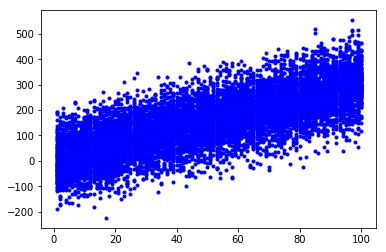

In [81]:
plt.plot(x, y, 'b.')

In [82]:
from sklearn.linear_model import LinearRegression

### Scikit-learn models need NumPy arrays

In [84]:
import pandas as pd

In [85]:
df = pd.DataFrame({'x': x, 'y': y})
df.head(3)

,x,y
0,70,312.647044
1,2,-15.564431
2,12,129.712181


In [86]:
xtrain = df[['x']]
ytrain = df['y']

xtrain.shape, ytrain.shape

((10000, 1), (10000,))

In [87]:
# xtrain must have the shape (N_DATA_POINTS, N_DIMENSIONS)
# ytrain must have the shape (N_DATA_POINTS, )

In [88]:
m = LinearRegression()

In [89]:
m.fit(xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [90]:
m.score(xtrain, ytrain)

0.566806693355273

In [91]:
m.coef_, m.intercept_

(array([2.97936737]), 5.23238114886513)

In [92]:
ypred = m.predict(xtrain)
ypred.shape

(10000,)

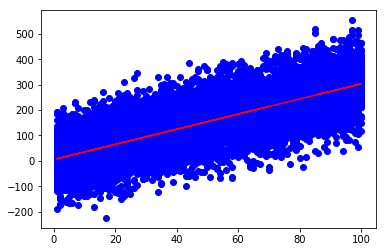

In [93]:
plt.plot(x, y, 'bo')
plt.plot(x, ypred, 'r-')

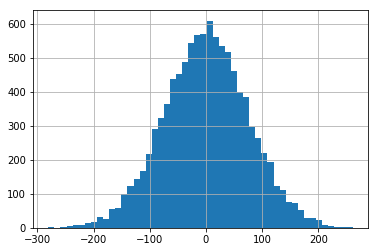

In [94]:
residuals = df['y'] - ypred
residuals.hist(bins=50)

In [95]:
# statsmodels -> gives more information about the model

In [96]:
residuals.mean()

-2.383728769927984e-14

In [99]:
df.corr()

,x,y
x,1.000000,0.752866
y,0.752866,1.000000


In [100]:
## Housing Dataset

In [101]:
from sklearn.datasets import load_boston

X, y = load_boston(return_X_y=True)

X.shape, y.shape

print(load_boston()['DESCR'])

## With statsmodels
*(more details)*

In [115]:
import statsmodels.formula.api as smf
import numpy as np

result = smf.ols('y ~ x', data=df).fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.567
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                 1.308e+04
Date:                Thu, 10 Jan 2019   Prob (F-statistic):               0.00
Time:                        15:18:21   Log-Likelihood:                -57378.
No. Observations:               10000   AIC:                         1.148e+05
Df Residuals:                    9998   BIC:                         1.148e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.2324      1.532      3.415      0.001       2.229       8.236
x              2.9794      0.026    114.376      0.000       2.928       3.030
==============================================================================
Omnibus:                        1.106   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.575   Jarque-Bera (JB):                1.089
Skew:                          -0.025   Prob(JB):                        0.580
Kurtosis:                       3.009   Cond. No.                         120.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [117]:
result.predict(xtrain)

0       213.788097
1        11.191116
2        40.984790
3       294.231016
4        97.592770
5        70.778463
6       163.138852
7       192.932525
8       189.953158
9        88.654667
10      160.159484
11       29.067320
12       70.778463
13      151.221382
14        8.211749
15      154.200750
16      106.530872
17      181.015056
18      115.468974
19      169.097586
20      273.375444
21      285.292914
22      219.746832
23      258.478607
24      279.334179
25      192.932525
26       64.819729
27       79.716565
28      118.448341
29       88.654667
           ...    
9970    267.416710
9971    252.519873
9972    181.015056
9973     38.005422
9974     11.191116
9975    186.973791
9976     58.860994
9977    130.365811
9978    270.396077
9979    157.180117
9980    267.416710
9981     88.654667
9982    279.334179
9983    154.200750
9984    276.354812
9985    169.097586
9986    288.272281
9987    234.643668
9988    103.551504
9989     35.026055
9990     43.964157
9991    219.